In [1]:
# ECGR 4105 Assignment 0
# Anthony Almonte
# #800916043
# 6/15/25

# Source code provided by Vinit Katariya and modified by
# Anthony Almonte to complete Assignment 0 objectives.

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd     # import libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ECGR 4105 csv/univariate_profits_and_populations_from_the_cities.csv' # Google Drive file path
df = pd.DataFrame(pd.read_csv(file_path))
df.head() # obtains first 'n' rows from dataset, n=5
M=len(df)
M

Mounted at /content/drive


97

In [3]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
X = df.values[:, 0]  # input values from first column -- x
y = df.values[:, 1]  # output values from second column -- y
m = len(y)  # # training examples
n = len(X)

print('X = ', X[: 5]) # prints first 5 and total # of training examples
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

X =  [6.1101 5.5277 8.5186 7.0032 5.8598]
y =  [17.592   9.1302 13.662  11.854   6.8233]
m =  97
n =  97


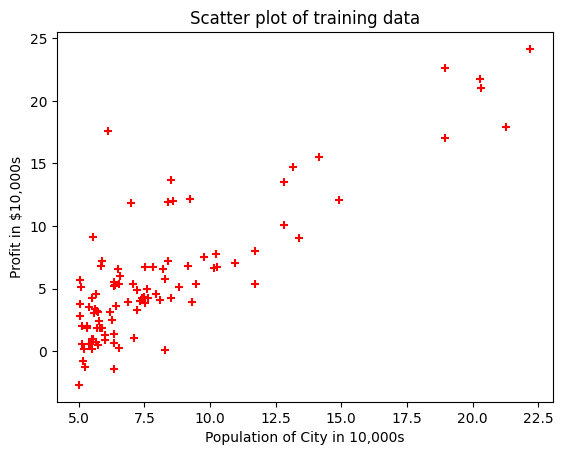

In [5]:
plt.scatter(X, y, color='red', marker='+')
plt.rcParams["figure.figsize"] = (10, 10)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')
plt.show()

In [6]:
m = len(y)  # # training examples
n = len(X)

In [7]:
X_0 = np.ones((m, 1)) # column vector of ones -- "bias" term for linear regression model
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [8]:
X_1 = X.reshape(m, 1) # reshaping features 'x' to make 2D array for matrix operations
X_1[:10]

array([[6.1101],
       [5.5277],
       [8.5186],
       [7.0032],
       [5.8598],
       [8.3829],
       [7.4764],
       [8.5781],
       [6.4862],
       [5.0546]])

In [9]:
X = np.hstack((X_0, X_1)) # horzonitally stacking X_0 and X_1 to create final feature matrix 'X'
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [10]:
theta = np.zeros(2)
theta

array([0., 0.])

In [11]:
def compute_cost(X, y, theta):
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(1 x m)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 Output Parameters
 -----------------
 J : Scalar value.
 """
 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute cost for linear regression.
    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(m x 1)
    theta : 1D array of fitting parameters or weights. Dimension (1 x n)
    alpha : Learning rate. Scalar value
    iterations: No of iterations. Scalar value.
    Output Parameters
    -----------------
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
    cost_history: Conatins value of cost for each iteration. 1D array. Dimension(m x 1)
    """
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

In [12]:
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)


The cost for given values of theta_0 and theta_1 = 32.072733877455676


In [13]:
theta = [0., 0.]  # Five different combinations of values were selected
iterations = 750; # parameters for plot # 1
alpha = 0.024;
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

theta2 = [1., 10.] # parameters for plot #2
iterations2 = 1000;
alpha2 = 0.005
theta2, cost_history2 = gradient_descent(X, y, theta2, alpha2, iterations2)

theta3 = [0., 0.] # parameters for plot #3
iterations3 = 150;
alpha3 = 0.0001
theta3, cost_history3 = gradient_descent(X, y, theta3, alpha3, iterations3)

theta4 = [3., 4.] # parameters for plot #4
iterations4 = 365;
alpha4 = 0.0005
theta4, cost_history4 = gradient_descent(X, y, theta4, alpha4, iterations4)

theta5 = [0., 0.] # parameters for plot #5
iterations5 = 750;
alpha5 = 0.025
theta5, cost_history5 = gradient_descent(X, y, theta5, alpha5, iterations5)

print('Final value of theta1 =', theta)
print('Final value of theta2 =', theta2)
print('Final value of theta3 =', theta3)
print('Final value of theta4 =', theta4)
print('Final value of theta5 =', theta5)
#print('cost_history5 =', cost_history5) # can be used to get min. value of cost function

Final value of theta1 = [-3.74189714  1.17757435]
Final value of theta2 = [-2.28406263  1.03111906]
Final value of theta3 = [0.04588732 0.56470353]
Final value of theta4 = [2.44002062 0.55653444]
Final value of theta5 = [-3.33978637e+16 -3.32446568e+17]


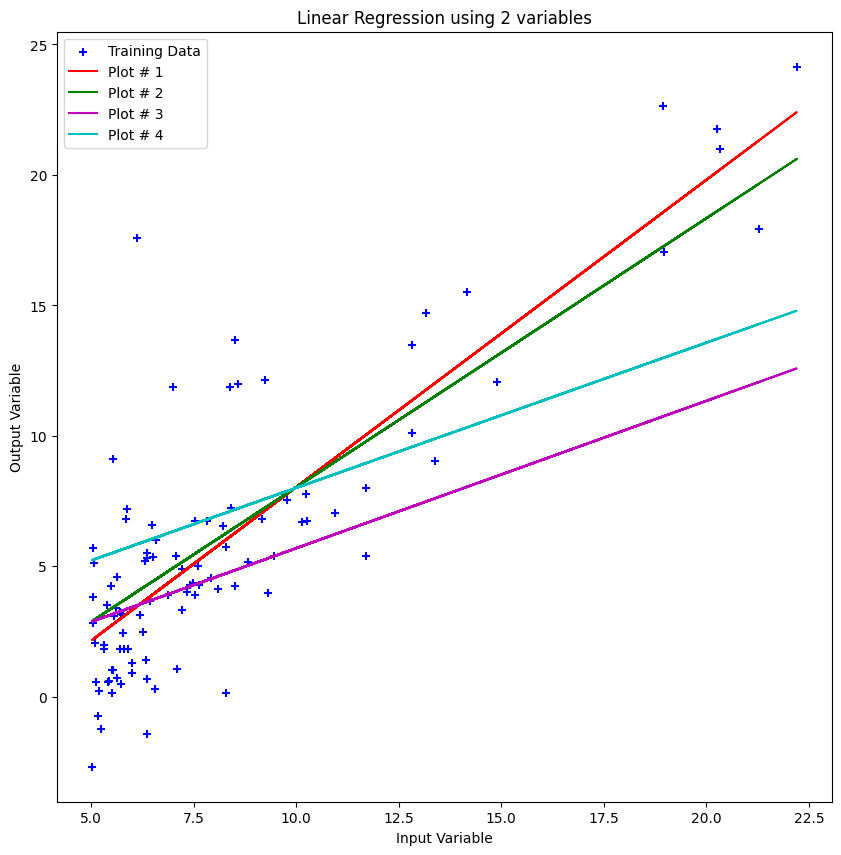

In [14]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], y, color='b', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='r', label='Plot # 1')
plt.plot(X[:,1],X.dot(theta2), color='g', label='Plot # 2')
plt.plot(X[:,1],X.dot(theta3), color='m', label='Plot # 3')
plt.plot(X[:,1],X.dot(theta4), color='c', label='Plot # 4')
#plt.plot(X[:,1],X.dot(theta5), color='y', label='Plot # 5') <-- Plotted seperately, throws off graph

plt.rcParams["figure.figsize"] = (10,6)

plt.xlabel('Input Variable')
plt.ylabel('Output Variable')
plt.title('Linear Regression using 2 variables')
plt.legend()

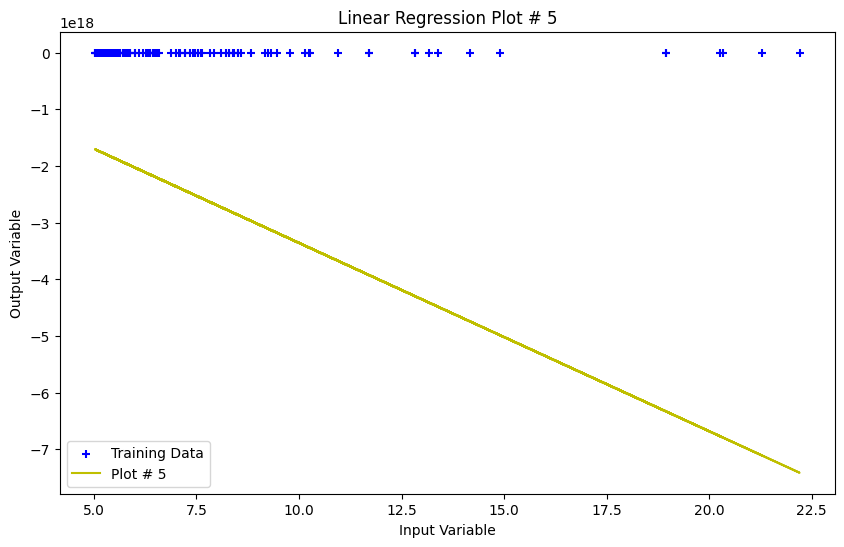

In [15]:
plt.scatter(X[:,1], y, color='b', marker= '+', label= 'Training Data') # plotted separatetly from the others
plt.plot(X[:,1],X.dot(theta5), color='y', label='Plot # 5')            # so graph parameters not thrown off

plt.rcParams["figure.figsize"] = (10,6)

plt.xlabel('Input Variable')
plt.ylabel('Output Variable')
plt.title('Linear Regression Plot # 5')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent Plot #1')

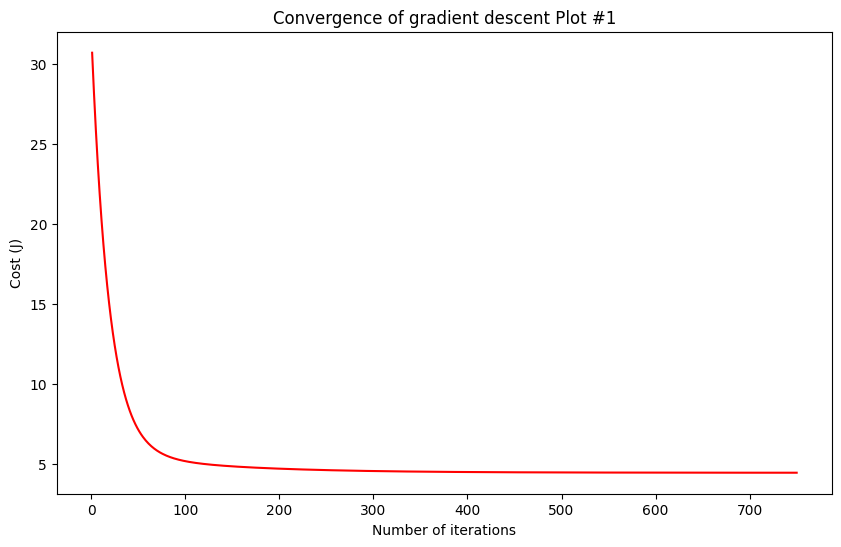

In [16]:
plt.plot(range(1, iterations + 1),cost_history, color='red', label = '# 1')

plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Plot #1')

Text(0.5, 1.0, 'Convergence of gradient descent Plot #2')

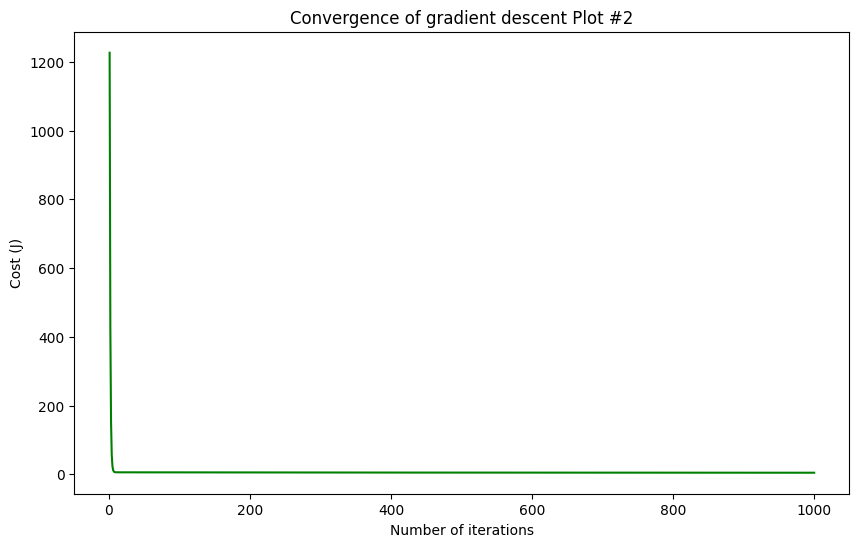

In [17]:
plt.plot(range(1, iterations2 + 1),cost_history2, color='green', label = '# 2')

plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Plot #2')

Text(0.5, 1.0, 'Convergence of gradient descent Plot #3')

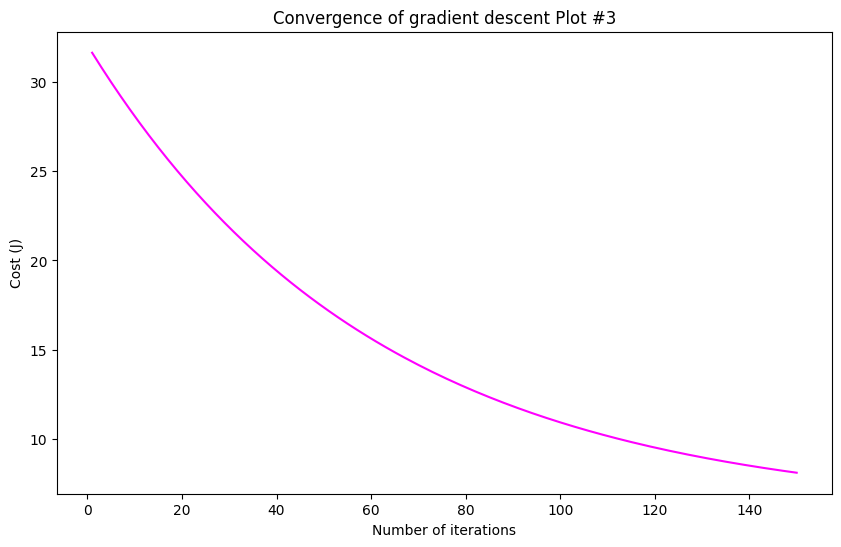

In [18]:
plt.plot(range(1, iterations3 + 1),cost_history3, color='magenta', label = '# 3')

plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Plot #3')

Text(0.5, 1.0, 'Convergence of gradient descent Plot #4')

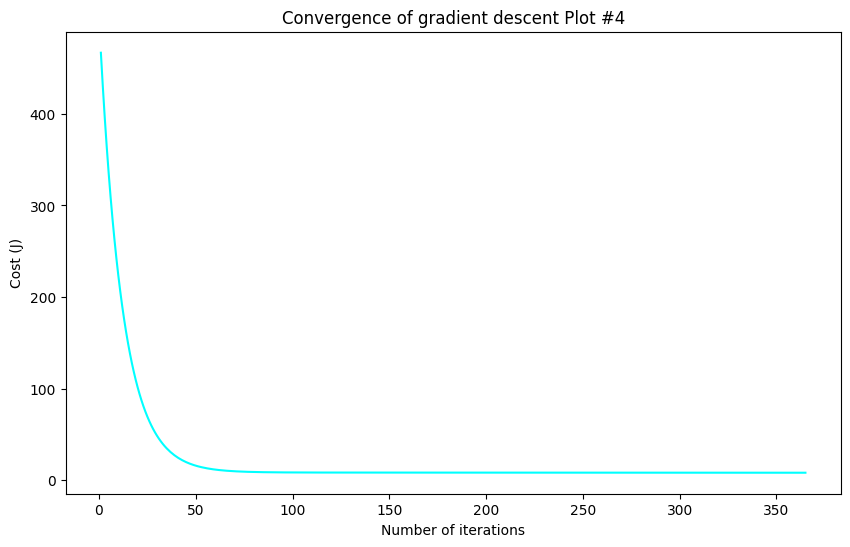

In [19]:
plt.plot(range(1, iterations4 + 1),cost_history4, color='cyan', label = '# 4')

plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Plot #4')

Text(0.5, 1.0, 'Convergence of gradient descent Plot #5')

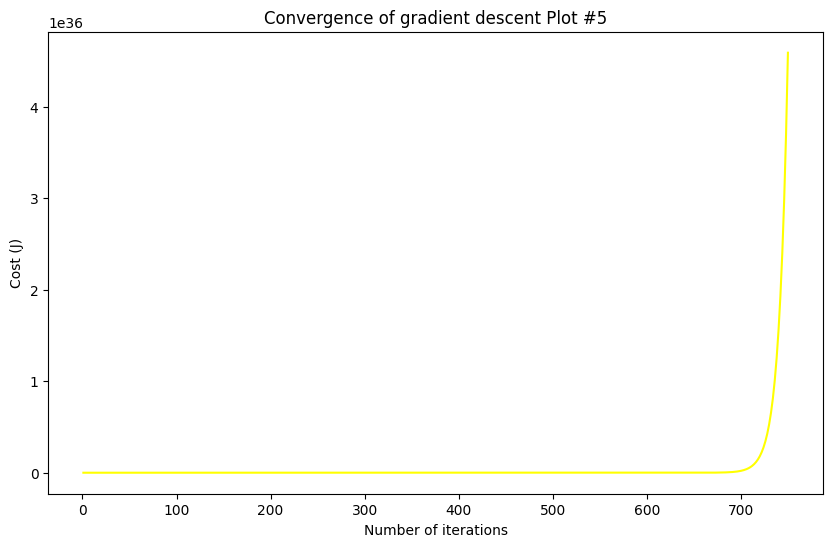

In [20]:
plt.plot(range(1, iterations5 + 1),cost_history5, color='yellow', label = '# 5')

plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Plot #5')